In [ ]:
!pip install tensorflow_datasets

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
help(tfds)

Help on package tensorflow_datasets:

NAME
    tensorflow_datasets - `tensorflow_datasets` (`tfds`) defines a collection of datasets ready-to-use with TensorFlow.

DESCRIPTION
    Each dataset is defined as a `tfds.core.DatasetBuilder`, which encapsulates
    the logic to download the dataset and construct an input pipeline, as well as
    contains the dataset documentation (version, splits, number of examples, etc.).
    
    The main library entrypoints are:
    
    * `tfds.builder`: fetch a `tfds.core.DatasetBuilder` by name
    * `tfds.load`: convenience method to construct a builder, download the data, and
      create an input pipeline, returning a `tf.data.Dataset`.
    
    Documentation:
    
    * These API docs
    * [Available datasets](https://www.tensorflow.org/datasets/catalog/overview)
    * [Colab tutorial](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb)
    * [Add a dataset](https://www.tensorflow.org/datasets/add_dataset

In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LRO8PS_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LRO8PS_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.LRO8PS_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels =[]

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [ ]:
training_labels

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [ ]:
training_sentences[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [ ]:
training_labels[3]

1

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
len(training_sentences),len(testing_sentences)

(25000, 25000)

In [ ]:
training_labels_final.size, testing_labels_final.size

(25000, 25000)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'


In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [ ]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
len(sequences)

25000

In [ ]:
sequences[0]

[58,
 11,
 13,
 34,
 438,
 399,
 17,
 173,
 28,
 8,
 32,
 1377,
 3400,
 41,
 495,
 196,
 24,
 87,
 155,
 18,
 11,
 210,
 339,
 28,
 69,
 247,
 212,
 8,
 485,
 61,
 69,
 87,
 115,
 98,
 23,
 5739,
 11,
 3316,
 656,
 776,
 11,
 17,
 6,
 34,
 405,
 8227,
 177,
 2476,
 425,
 1,
 91,
 1252,
 139,
 71,
 148,
 54,
 1,
 7524,
 71,
 228,
 69,
 2961,
 15,
 2879,
 1505,
 4997,
 2,
 39,
 3946,
 118,
 1607,
 16,
 3400,
 13,
 162,
 18,
 3,
 1252,
 926,
 7985,
 8,
 3,
 17,
 12,
 13,
 4199,
 4,
 101,
 147,
 1236,
 10,
 239,
 691,
 12,
 43,
 24,
 100,
 38,
 11,
 7231,
 38,
 1377,
 51,
 408,
 10,
 98,
 1213,
 873,
 144,
 9]

In [ ]:
len(padded[0])

120

In [ ]:
padded

array([[   0,    0,    0, ...,  873,  144,    9],
       [   0,    0,    0, ...,   31,   30,   46],
       [6174,    1, 4915, ...,    8, 6175,   46],
       ...,
       [7628,   36,   10, ...,  167,    5,   28],
       [2676,   10,  215, ...,    1,   88,   10],
       [3874,    4,   30, ...,    5,  994, 5125]], dtype=int32)

In [ ]:
padded.shape

(25000, 120)

In [ ]:
testing_padded.shape

(25000, 120)

In [ ]:
padded.dtype

dtype('int32')

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')

])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_rnn.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 131s 164ms/step - loss: 0.6739 - accuracy: 0.5622 - val_loss: 0.6787 - val_accuracy: 0.5680
Epoch 2/10
782/782 [==============================] - 104s 134ms/step - loss: 0.6483 - accuracy: 0.6256 - val_loss: 0.6978 - val_accuracy: 0.5613
Epoch 3/10
782/782 [==============================] - 118s 151ms/step - loss: 0.5183 - accuracy: 0.7430 - val_loss: 0.6898 - val_accuracy: 0.5678
Epoch 4/10
782/782 [==============================] - 195s 250ms/step - loss: 0.4232 - accuracy: 0.8080 - val_loss: 0.5767 - val_accuracy: 0.7560
Epoch 5/10
782/782 [==============================] - 99s 126ms/step - loss: 0.2690 - accuracy: 0.8914 - val_loss: 0.7209 - val_accuracy: 0.7111
Epoch 6/10
782/782 [==============================] - 113s 145ms/step - loss: 0.1057 - accuracy: 0.9625 - val_loss: 1.1132 - val_accuracy: 0.6421
Epoch 7/10
782/782 [==============================] - 122s 156ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 1.1545 - 

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt

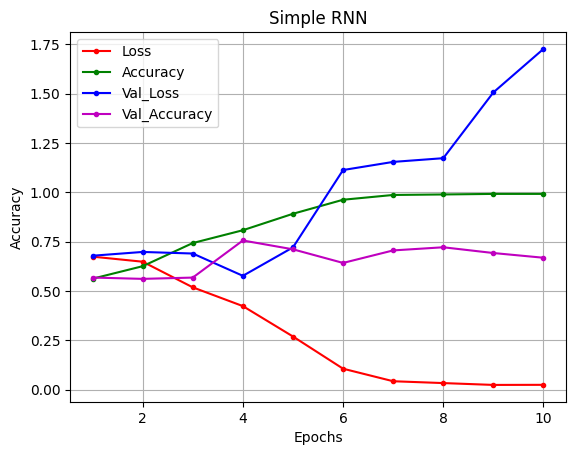

In [ ]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color = "r",label = "Loss",marker =".")
plt.plot(range(1,11), history.history['accuracy'], color = "g",label = "Accuracy",marker =".")
plt.plot(range(1,11), history.history['val_loss'], color = "b",label = "Val_Loss",marker =".")
plt.plot(range(1,11), history.history['val_accuracy'], color = "m",label = "Val_Accuracy",marker =".")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
from keras.layers import LSTM, Bidirectional, GRU

In [ ]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')

])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_lstm = model_lstm.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 41s 47ms/step - loss: 0.5044 - accuracy: 0.7496 - val_loss: 0.3768 - val_accuracy: 0.8402
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3051 - accuracy: 0.8796 - val_loss: 0.3729 - val_accuracy: 0.8436
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2422 - accuracy: 0.9088 - val_loss: 0.4630 - val_accuracy: 0.8269
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.1947 - accuracy: 0.9297 - val_loss: 0.4124 - val_accuracy: 0.8326
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1604 - accuracy: 0.9447 - val_loss: 0.4368 - val_accuracy: 0.8303
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1354 - accuracy: 0.9539 - val_loss: 0.5220 - val_accuracy: 0.8298
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1162 - accuracy: 0.9608 - val_loss: 0.4956 - val_accuracy:

In [ ]:
history_lstm.history

{'loss': [0.5043769478797913,
  0.30509912967681885,
  0.24216555058956146,
  0.19465072453022003,
  0.16042560338974,
  0.135366752743721,
  0.11623969674110413,
  0.09688127785921097,
  0.07626605033874512,
  0.07159601897001266],
 'accuracy': [0.7495999932289124,
  0.8795599937438965,
  0.9088000059127808,
  0.9297199845314026,
  0.9446799755096436,
  0.9539200067520142,
  0.9608399868011475,
  0.9698799848556519,
  0.9775599837303162,
  0.9792400002479553],
 'val_loss': [0.3768441081047058,
  0.37294596433639526,
  0.4629836976528168,
  0.4123542606830597,
  0.43684500455856323,
  0.5219857096672058,
  0.49557819962501526,
  0.5345180034637451,
  0.6447157263755798,
  0.6644056439399719],
 'val_accuracy': [0.8402000069618225,
  0.843559980392456,
  0.8268799781799316,
  0.8325600028038025,
  0.8303200006484985,
  0.8297600150108337,
  0.82396000623703,
  0.8157200217247009,
  0.8203200101852417,
  0.8235599994659424]}

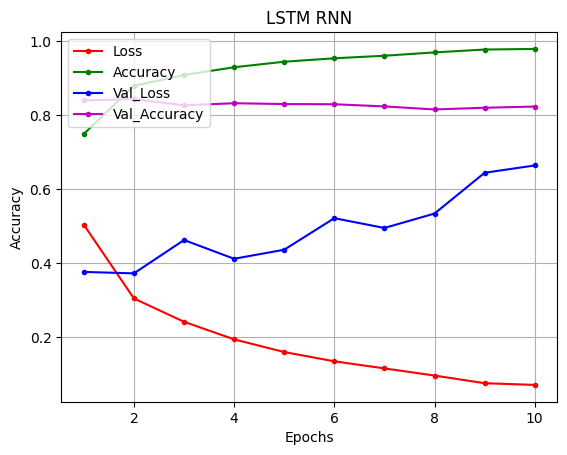

In [ ]:
plt.title('LSTM RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11), history_lstm.history['loss'], color = "r",label = "Loss",marker =".")
plt.plot(range(1,11), history_lstm.history['accuracy'], color = "g",label = "Accuracy",marker =".")
plt.plot(range(1,11), history_lstm.history['val_loss'], color = "b",label = "Val_Loss",marker =".")
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color = "m",label = "Val_Accuracy",marker =".")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')

])
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 165141 (645.08 KB)
Trainable params: 165141 (645.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compile
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_gru = model_gru.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 33s 39ms/step - loss: 0.5769 - accuracy: 0.6657 - val_loss: 0.3643 - val_accuracy: 0.8408
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 0.3252 - accuracy: 0.8658 - val_loss: 0.3597 - val_accuracy: 0.8488
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.2510 - accuracy: 0.9043 - val_loss: 0.3767 - val_accuracy: 0.8461
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2074 - accuracy: 0.9234 - val_loss: 0.3903 - val_accuracy: 0.8382
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.1678 - accuracy: 0.9415 - val_loss: 0.4478 - val_accuracy: 0.8394
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1353 - accuracy: 0.9542 - val_loss: 0.4875 - val_accuracy: 0.8332
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1023 - accuracy: 0.9676 - val_loss: 0.5300 - val_accuracy:

In [ ]:
history_gru.history

{'loss': [0.5769352912902832,
  0.3252222537994385,
  0.251038521528244,
  0.20742355287075043,
  0.1677912175655365,
  0.13525891304016113,
  0.10233768820762634,
  0.07924389094114304,
  0.05745312571525574,
  0.05216133967041969],
 'accuracy': [0.6656799912452698,
  0.8658000230789185,
  0.9042800068855286,
  0.9234399795532227,
  0.9414799809455872,
  0.954200029373169,
  0.9676399827003479,
  0.9760000109672546,
  0.9827200174331665,
  0.9836400151252747],
 'val_loss': [0.364315390586853,
  0.3597378432750702,
  0.3766520321369171,
  0.3902900815010071,
  0.447844535112381,
  0.487477570772171,
  0.5299933552742004,
  0.5804106593132019,
  0.699526846408844,
  0.6761229038238525],
 'val_accuracy': [0.8408399820327759,
  0.848800003528595,
  0.8461199998855591,
  0.8381999731063843,
  0.8393599987030029,
  0.8331599831581116,
  0.8296800255775452,
  0.8259599804878235,
  0.822920024394989,
  0.8226400017738342]}

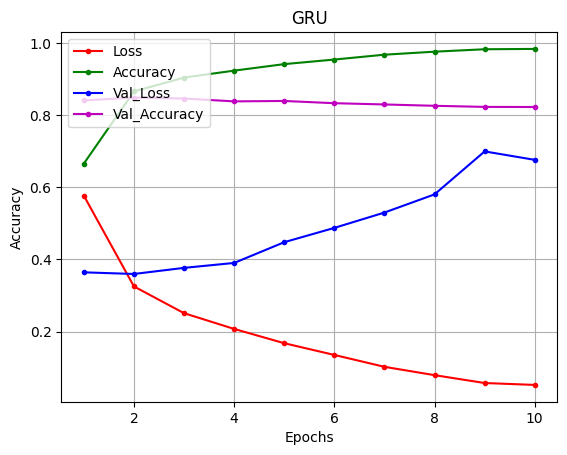

In [ ]:
plt.title('GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11), history_gru.history['loss'], color = "r",label = "Loss",marker =".")
plt.plot(range(1,11), history_gru.history['accuracy'], color = "g",label = "Accuracy",marker =".")
plt.plot(range(1,11), history_gru.history['val_loss'], color = "b",label = "Val_Loss",marker =".")
plt.plot(range(1,11), history_gru.history['val_accuracy'], color = "m",label = "Val_Accuracy",marker =".")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# bidirectional gru
model_b_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')

])
model_b_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
model_b_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_b_gru = model_b_gru.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 41s 47ms/step - loss: 0.4867 - accuracy: 0.7415 - val_loss: 0.3706 - val_accuracy: 0.8340
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2838 - accuracy: 0.8852 - val_loss: 0.3587 - val_accuracy: 0.8403
Epoch 3/10
782/782 [==============================] - 20s 25ms/step - loss: 0.2177 - accuracy: 0.9158 - val_loss: 0.3775 - val_accuracy: 0.8404
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1653 - accuracy: 0.9390 - val_loss: 0.4177 - val_accuracy: 0.8252
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1210 - accuracy: 0.9583 - val_loss: 0.5407 - val_accuracy: 0.8270
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0848 - accuracy: 0.9716 - val_loss: 0.6419 - val_accuracy: 0.8206
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.0653 - accuracy: 0.9778 - val_loss: 0.6895 - val_accuracy:

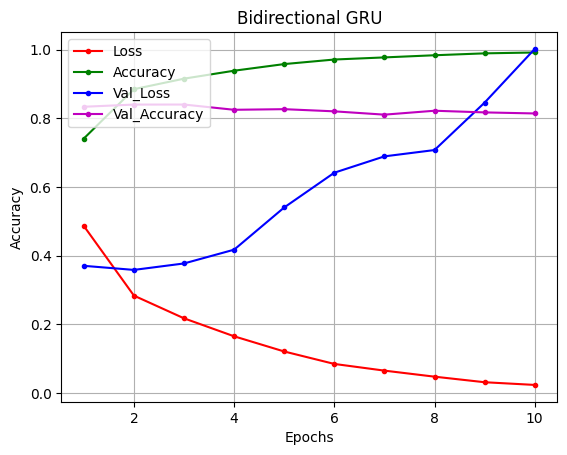

In [ ]:
plt.title('Bidirectional GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11), history_b_gru.history['loss'], color = "r",label = "Loss",marker =".")
plt.plot(range(1,11), history_b_gru.history['accuracy'], color = "g",label = "Accuracy",marker =".")
plt.plot(range(1,11), history_b_gru.history['val_loss'], color = "b",label = "Val_Loss",marker =".")
plt.plot(range(1,11), history_b_gru.history['val_accuracy'], color = "m",label = "Val_Accuracy",marker =".")
plt.legend(loc = "upper left")
plt.show()

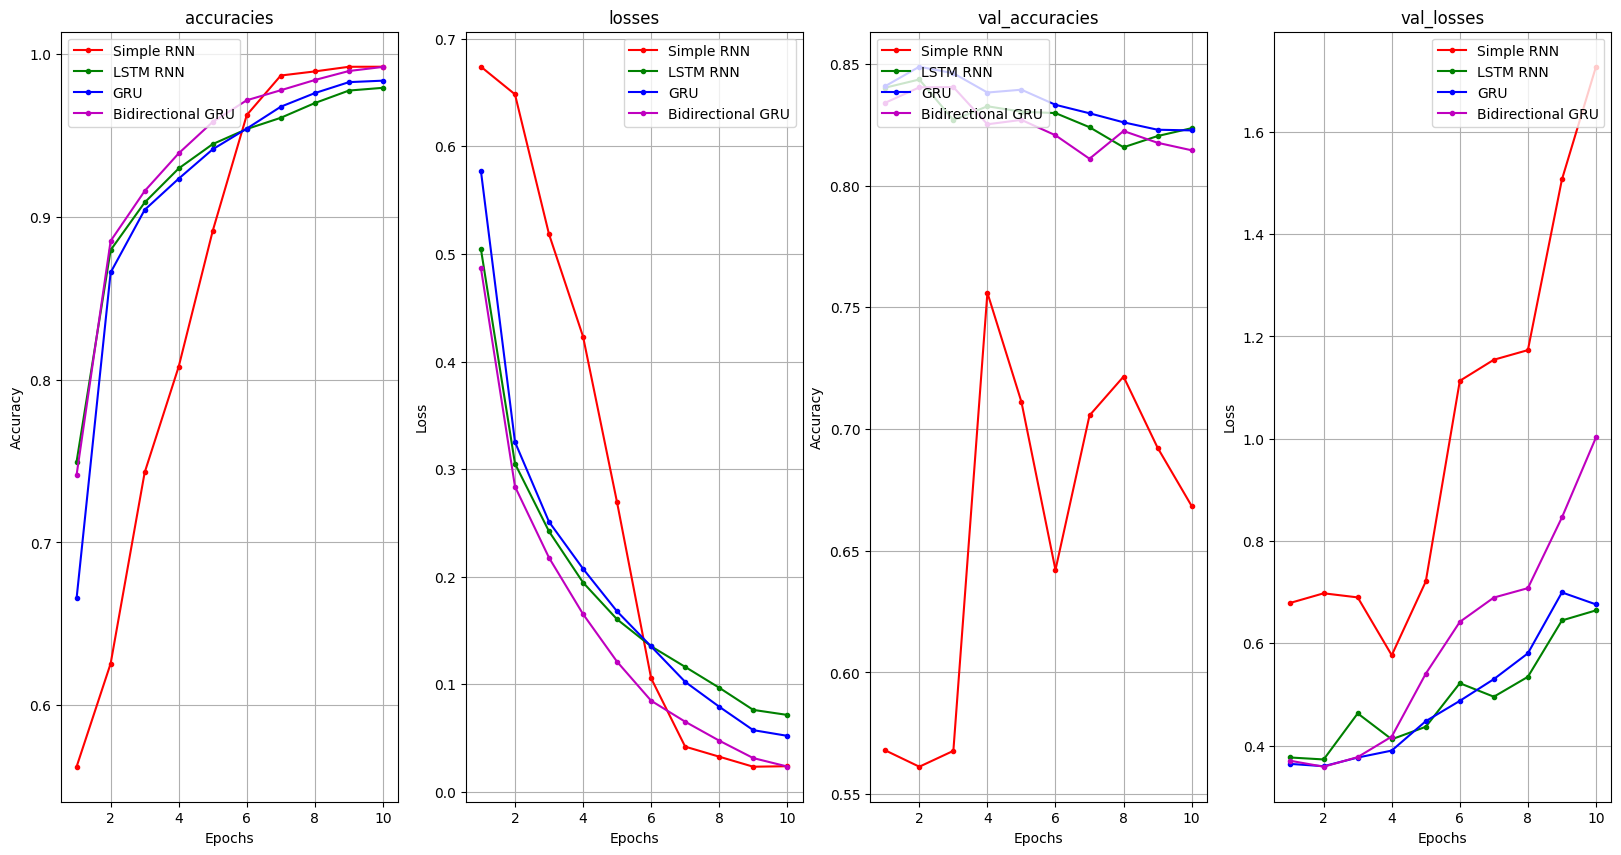

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11),history.history['accuracy'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['accuracy'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['accuracy'],c="b",label = "GRU",marker =".")
plt.plot(range(1,11),history_b_gru.history['accuracy'],c="m",label = "Bidirectional GRU",marker =".")
plt.legend(loc = "upper left")

plt.subplot(1,4,2)
plt.title('losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(range(1,11),history.history['loss'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['loss'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['loss'],c="b",label = "GRU",marker =".")
plt.plot(range(1,11),history_b_gru.history['loss'],c="m",label = "Bidirectional GRU",marker =".")
plt.legend(loc = "upper right")

plt.subplot(1,4,3)
plt.title('val_accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11),history.history['val_accuracy'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['val_accuracy'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['val_accuracy'],c="b",label = "GRU",marker =".")
plt.plot(range(1,11),history_b_gru.history['val_accuracy'],c="m",label = "Bidirectional GRU",marker =".")
plt.legend(loc = "upper left")

plt.subplot(1,4,4)
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(range(1,11),history.history['val_loss'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['val_loss'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['val_loss'],c="b",label = "GRU",marker =".")
plt.plot(range(1,11),history_b_gru.history['val_loss'],c="m",label = "Bidirectional GRU",marker =".")
plt.legend(loc = "upper right")

plt.show()

In [ ]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time.'
new2 = 'This was the best movie. Please watch it.'
new3 = 'A must watch movie. I loved to watch it. It was jsut amazing.'

In [ ]:
def predict1(new):
  new = tokenizer.texts_to_sequences([new])
  new = pad_sequences(new, maxlen=max_length)
  return model_rnn.predict(new), model_lstm.predict(new), model_gru.predict(new), model_b_gru.predict(new)

In [ ]:
rnn1, lstm1, gru1, b_gru1 = predict1(new1)
rnn2, lstm2, gru2, b_gru2 = predict1(new2)
rnn3, lstm3, gru3, b_gru3 = predict1(new3)

1/1 [==============================] - 0s 18ms/step


In [ ]:
print('rnn output:',rnn1,rnn2,rnn3)

rnn output: [[0.00066682]] [[0.585354]] [[0.9992999]]


In [ ]:
def output_form(x):
  if x > 0.5:
    return 1,'P'
  else:
    return 0,'N'


In [ ]:
print('rnn output:',output_form(rnn1),output_form(rnn2),output_form(rnn3))

rnn output: (0, 'N') (1, 'P') (1, 'P')


In [ ]:
print(f'lstm output :text1{output_form(lstm1)}, probability{lstm1}')
print(f'gru output :text1{output_form(gru1)}, probability{gru1}')
print(f'b_gru output :text1{output_form(b_gru1)}, probability{b_gru1})')

lstm output :text1(0, 'N'), probability[[0.0004239]]
gru output :text1(0, 'N'), probability[[4.661579e-06]]
b_gru output :text1(0, 'N'), probability[[4.2593696e-05]])


In [ ]:
print(f'lstm output :text2{output_form(lstm2)}, probability{lstm2}')
print(f'gru output :text2{output_form(gru2)}, probability{gru2}')
print(f'b_gru output :text2{output_form(b_gru2)}, probability{b_gru2})')

lstm output :text2(1, 'P'), probability[[0.98899615]]
gru output :text2(1, 'P'), probability[[0.91454905]]
b_gru output :text2(1, 'P'), probability[[0.99771786]])


In [ ]:
print(f'lstm output :text3{output_form(lstm3)}, probability{lstm3}')
print(f'gru output :text3{output_form(gru3)}, probability{gru3}')
print(f'b_gru output :text3{output_form(b_gru3)}, probability{b_gru3}')

lstm output :text3(1, 'P'), probability[[0.9955605]]
gru output :text3(1, 'P'), probability[[0.98750824]]
b_gru output :text3(1, 'P'), probability[[0.9999651]]
